In [6]:
import pennylane as qml
import numpy as np
from pennylane.operation import Operation
import math as math

[[1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1]
 [1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0]]


/var/folders/yj/hd9lb5wn7ms2gf09wbjpmf_40000gn/T/ipykernel_19407/264278766.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


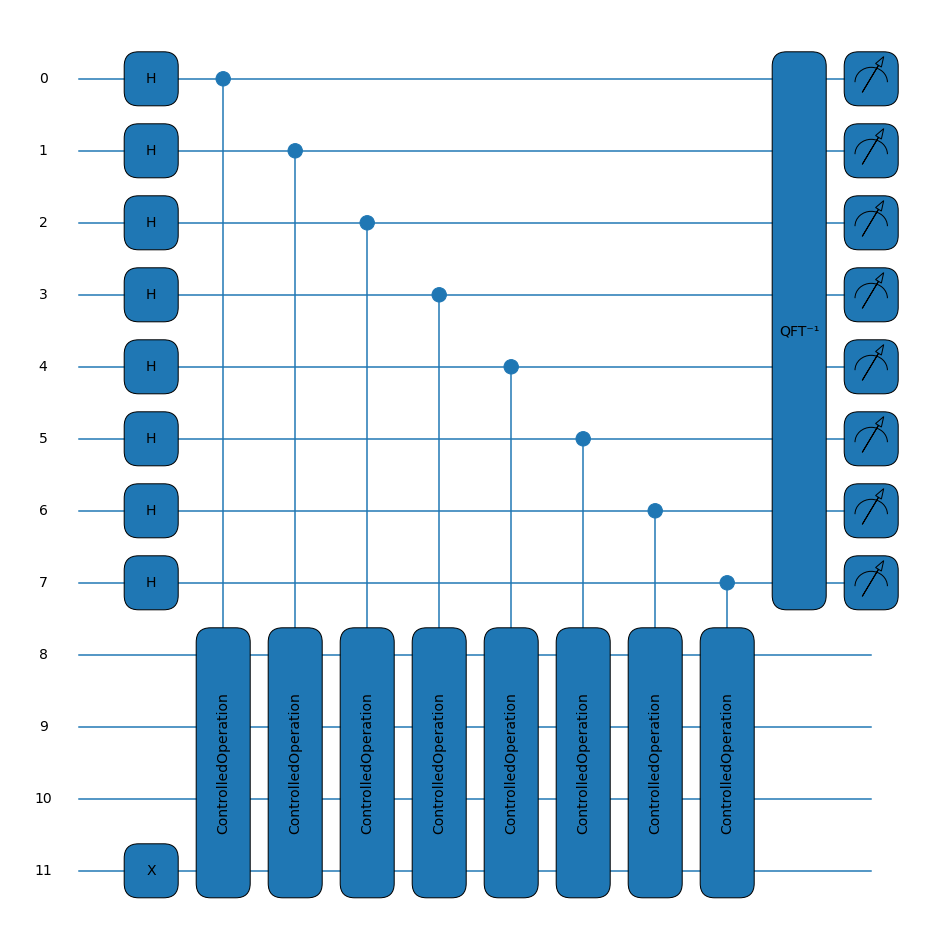

In [7]:
# Shor's Algorithm (Factoring 15)

n_count = 8

dev = qml.device('default.qubit', wires = n_count + 4, shots = 20)

def c_amod15(a, power):
    for iteration in range(power):
        if a in [2, 13]:
            qml.SWAP(wires = [8, 9])
            qml.SWAP(wires = [9, 10])
            qml.SWAP(wires = [10, 11])
        if a in [7, 8]:
            qml.SWAP(wires = [10, 11])
            qml.SWAP(wires = [9, 10])
            qml.SWAP(wires = [8, 9])
        if a == 11:
            qml.SWAP(wires = [9, 11])
            qml.SWAP(wires = [8, 10])
        if a in [7, 11, 13]:
            for k in range(8, 12):
                qml.PauliX(wires = k)
                
        
@qml.qnode(dev)
def circuit():
    N = 15
    np.random.seed(1)
    a = np.random.randint(2, 15)
    if math.gcd(a, N) != 1:
        raise ValueError("Non-trivial factor.")
        
    for y in range(0, 8):
        qml.Hadamard(wires = y)
    
    qml.PauliX(wires = n_count + 3)
    
   
    for x in range(0, 8):
        qml.ctrl(c_amod15, control = x)(a, 2**x)
        
    qml.adjoint(qml.QFT)(wires = [0, 1, 2, 3, 4, 5, 6, 7])
    
    return qml.sample(wires = range(0, 8))
    
circuit()
print(circuit())

fig, ax = qml.draw_mpl(circuit)()
fig.show()